# 딥러닝 기초

기술은 빠르게 변하지만, 우리 상상력만큼 빠르게 변하지 못한다. 뇌를 흉내내고자 했다.

연구의 시작은 '디바이드 앤 컨쿼'를 해결하려고 하는 거다. 가장 작은 단위부터 접근하는 것이다.

초기민감도 (바이어스)를 이용해서, 학습이 잘되게 할수도 있고 조금 둔감하게 할 수도 있다.

### XOR

다르면 1이고, 같으면 0인데 무슨짓을 해서라도 안 된다. 1차함수로 해결할 수 없어서 퍼셉트론의 종말이 일어났다.

그런데 퍼셉트론을 동시에 여러개를 사용해보는 시도에서, 이것이 가능하게 되었다. 하나의 겹침을 레이어라고 불렀다.

이것으로 인해서 non-linear 문제를 해결할 수 있게 되었다. (자료 올려두실 것임)

### 데이터 전처리 기법

1. filter
2. feature extraction
3. ???

그런데 딥러닝 처음에 나오는 부분이 feature extraction 기법이다.

오토 케라스로 딥러닝 레이어, 유닛을 정해주는 것도 있다. ★★★

### 와이드 vs 딥

레이어가 많으면, 딥하다 그러고 유닛이 많으면 와이드 하다 그런다.

적정한 구조를 찾아야 하는 것이다.

### 딥러닝 양대산맥

텐서플로 vs 케라스 vs 파이토치

그런데 텐서플로와 케라스가 합병! 그래서 파이토치 vs 텐서플로 구조로 간다.

그래서 파이토치의 단점은 시스템화 하기가 어렵다는 것이다. 그래서 이번에 새로운 버전은 C++로 연동이 된다고 했다.

텐서플로는 산업화가 막강하다. 우리는 텐서플로 케라스 쪽을 더 집중할 것이다.

### 시작하기 전에...

텐서플로는 텐서기반으로 뉴럴 네트워크 프레임 만드는 것에 최적화 되어 있다고 생각하면 된다.

# 케라스 3가지 + 텐서플로 1가지 (에스티메이터는 빠이...)
케라스 방식
1. 기존 클래스 사용 방식
2. 함수형 패러다임 이용 방식
3. 상속을 이용하는 방식

<br>

텐서플로 방식
1. 처음부터 텐서로 짜는 방식

In [1]:
from sklearn.linear_model import Perceptron

Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# 초보자용 - keras 이용

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 이렇게 해주는게 훨씬 좋다. 0~1 사이에 있는 값을 찾는게 훨씬 좋다.
# 이렇게 전처리를 하는 것이다. 그런데 어떤 데이터에 따라서 이걸 안해주는게 더 좋을 수도 있다.

레이어의 종류

1. 이론상에 나오는 레이어
2. 코딩을 쉽게 해주는 레이어

유닛의 개수는 관례상 2의 배수!

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Dropout # 이렇게 해주면 엄청 편하다.

In [5]:
# 전체구조를 그래도 만들어 준는게 sequencial 이다.
model = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)), # 코딩을 편안하게 해주는 레이어
    # input레이어 만드는 대신, ★input_shape를 명시해줘야 한다. 1. shape 명시, 2. 디멘션 명시 2가지 방법이 있다.
  Dense(128, activation='relu'), # 기본적인 fully-connected layer를 말한다. 유닛 개수만 집어넣어주면 된다.
    # activation은 2가지로 지정할 수 있다. 커널 이니셜라이즈는 가중치 초기값 지정하는 것이다.
  Dropout(0.2), # 랜덤하게 유닛 선택해서 탈락시킴. 그런데 이건 앞의 레이어에 적용되는 것임. (state machine)
  Dense(10, activation='softmax')
],
name = '해찬모델') #나중에 텐서보드 관리할 때 좋다. 레이어도 이름 붙이면 좋다.

In [6]:
# 이렇게 flatten을 빼도 된다. 대신 input shape는 지정해줘야 한다.
model = tf.keras.models.Sequential([
  Dense(128, input_shape = (28, 28), activation='relu'), 
  Dropout(0.2), 
  Dense(10, activation='softmax')
],
name = 'aaa') #나중에 텐서보드 관리할 때 좋다. 레이어도 이름 붙이면 좋다.

# 모양을 어떻게 학습시킬까 전략을 짜는 것이 컴파일이다.
# 1. loss function 썼고 -> 실제값하고 예측값하고 차이를 보는 것.
# 데이터와 목적에 따라서 로스 펑션이 달라진다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary() # 나중에 텐서보드 관리할 때 좋다.

Model: "aaa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 128)           3712      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 28, 10)            1290      
Total params: 5,002
Trainable params: 5,002
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 연습
model = tf.keras.models.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128)
])

In [15]:
# model2 = tf.keras.models.Sequential()
# model.add() # 케라스의 첫번재 레이어는 input 레이어는 고려 안한다.

In [10]:
import keras # 텐서플로 백앤드를 자동으로 써준다.

Using TensorFlow backend.


In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [12]:
tf.__version__

'2.0.0'

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3011 - accuracy: 0.9096
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1459 - accuracy: 0.9560
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1112 - accuracy: 0.9657
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0934 - accuracy: 0.9706
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0813 - accuracy: 0.9745
10000/1 - 1s - loss: 0.0413 - accuracy: 0.9741


[0.08185884740294423, 0.9741]

In [23]:
model.fit(x_train, y_train, epochs=10, verbose = 1) # 이건 verbose 1이 마음에 든다.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0348 - accuracy: 0.9889
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0347 - accuracy: 0.9891
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0334 - accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0330 - accuracy: 0.9893
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0315 - accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0323 - accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0308 - accuracy: 0.9902
Epoch 8/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0327 - accuracy: 0.9902
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0307 - accuracy: 0.9900
Epoch 10/10
60

### verbose하는 것에 따라서 달라진다. verbose는 2쓰는게 가장 좋군.

In [19]:
model.evaluate(x_test,  y_test, verbose=0)

[0.06956907928318906, 0.9821]

In [20]:
model.evaluate(x_test,  y_test, verbose=1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06956907928318906, 0.9821]

In [21]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0348 - accuracy: 0.9821


[0.06956907928318906, 0.9821]

에폭 높아지면, 오버피팅 문제가 수반된다.

# 이제 중급

https://keras.io/getting-started/functional-api-guide/

★ 아래 방법을 쓰면, 멀티 인풋, 멀티 아웃풋을 쓸 수 있다.

이론을 그대로 잘 구현한 애가 케라스이다. 개념을 그대로 가져와서 멋지다.

In [20]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [47]:
data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
data = data.shuffle(100000)
data

<ShuffleDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

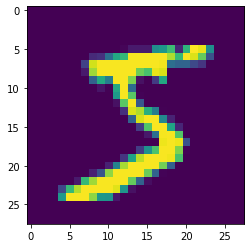

In [39]:
data = x_train.reshape(-1, 784)
plt.imshow(data[0,:].reshape(28, 28))

In [34]:
data.shape

(60000, 784)

In [48]:
# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(128, activation='relu')(inputs)
output_2 = Dense(64, activation='relu')(output_1)
predictions = Dense(10, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions) # 모델은 이렇게 2개만 해주면 됨.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, y_train)  # starts training

AttributeError: 'ShuffleDataset' object has no attribute 'ndim'

In [3]:
import tensorflow as tf

In [29]:
tensorflow.keras.Sequential.__bases__

(tensorflow.python.keras.engine.training.Model,)

In [31]:
issubclass(tensorflow.keras.Sequential, Model)

False

# 세번째 방법 (전문가)

https://www.tensorflow.org/tutorials/quickstart/advanced

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model # 멀티 인풋, 멀티 아웃풋 가능

### 학습을 시키는 3가지 방식

1. fit (저질방식)
2. train on batch (배치사이즈에 따라서 고급화)
3. gradient tape

러닝레이트를 세분화 시킬 수 있다. (단계에 따라서) 정말 많은 학습방법이 있구나... 

In [34]:
x = tf.constant([1, 2, 3])
x # tensorflow 1이 속도는 더 빠르나, 텐서2버전이 더 코딩하기 좋다.
# eagerly executing 방식, 명령형 패러다임

<tf.Tensor: id=233813, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [ ]:
x = tf.constant([1, 2, 3])
x = tf.constant([3, 4, 5]) # 파이썬은 재할당이 가능하기 때문에 이런게 가능하다.

In [37]:
x.numpy() # 내부적으로 넘파이이다.

array([1, 2, 3])

텐서플로는 gpu를 지원해준다. 넘파이는 지원안해준다.

텐서플로는 뉴럴네트워크 관련된 애들만 있다. 다른 범용 기능은 아예 없다.

텐서플로에서 값을 할당하는 얘는 assign이라는 애가 있다.

In [41]:
y = tf.Variable([1, 2, 3])
y.assign([3, 6, 6])
y

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([3, 6, 6])>

In [43]:
x = tf.constant([1, 2, 3])
x.assign([3, 4, 4]) # 상수는 값을 재할당 못한다. 그래서 상수이다.
x

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [44]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4])) # 벡터라이즈 계산

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)


In [47]:
tf.reduce_sum([1, 2, 3, 4, 5]) # reduce는 스트라이드 때문에 쉽기 때문에, axis 계산이 가능하다.

<tf.Tensor: id=233847, shape=(), dtype=int32, numpy=15>

In [48]:
print(tf.square(2) + tf.square(3))

tf.Tensor(13, shape=(), dtype=int32)


In [4]:
# 연산자 오버로딩
tf.square([2]) + tf.square([3]) # 이렇게 된다.

<tf.Tensor: id=4, shape=(1,), dtype=int32, numpy=array([13])>

복습은 텐서플로 공식사이트 가서 쳐봐라.